In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import os
# import face_recognition
from deepface import DeepFace
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [13]:
dataset_path = "C:\\Users\\71519\\Downloads\\facess\\train"

In [14]:
data_gen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2,  # Split dataset for training and validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),  # Resize all images to 128x128
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 77 images belonging to 5 classes.


Found 16 images belonging to 5 classes.


In [ ]:
# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])


In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [37]:
# Train the Model
history = model.fit(
    train_data,
    epochs=75,
    validation_data=val_data
)

Epoch 1/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 474ms/step - accuracy: 0.5782 - loss: 1.1122 - val_accuracy: 0.5000 - val_loss: 1.0920
Epoch 2/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.6905 - loss: 0.8072 - val_accuracy: 0.6250 - val_loss: 1.1411
Epoch 3/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 424ms/step - accuracy: 0.5085 - loss: 1.1831 - val_accuracy: 0.4375 - val_loss: 1.1149
Epoch 4/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 518ms/step - accuracy: 0.5920 - loss: 1.0423 - val_accuracy: 0.5625 - val_loss: 1.1020
Epoch 5/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 633ms/step - accuracy: 0.6970 - loss: 0.8152 - val_accuracy: 0.4375 - val_loss: 1.1994
Epoch 6/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 841ms/step - accuracy: 0.7360 - loss: 0.7829 - val_accuracy: 0.4375 - val_loss: 1.2802
Epoch 7/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 764ms/step - accuracy: 0.6450 - loss: 0.9363 - val_accuracy: 0.3750 - val_loss: 1.1722
Epoch 8/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 510ms/step - accuracy: 0.7012 - loss: 0.8257 - val_accuracy: 0.5000 - val_loss:

In [38]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.6250 - loss: 0.8709
Validation Loss: 0.8709
Validation Accuracy: 0.6250


In [39]:
# Plot Training and Validation Metrics
plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Accuracy Over Epochs')

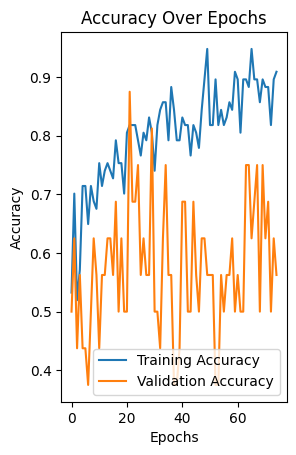

In [40]:
# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

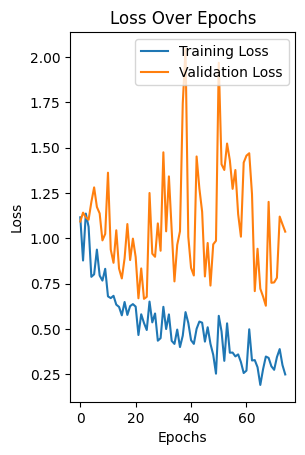

In [41]:
# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()

In [42]:
model.save('face_classification_model.keras')


In [43]:
model = load_model('face_classification_model.keras')


In [44]:
# Retrieve Class Indices Mapping from train_data
class_indices = train_data.class_indices
print("Class Indices Mapping:", class_indices)

# Reverse the Mapping for Predictions
reverse_class_indices = {v: k for k, v in class_indices.items()}
print("Reverse Class Indices Mapping:", reverse_class_indices)

Class Indices Mapping: {'ben_afflek': 0, 'elton_john': 1, 'jerry_seinfeld': 2, 'madonna': 3, 'mindy_kaling': 4}
Reverse Class Indices Mapping: {0: 'ben_afflek', 1: 'elton_john', 2: 'jerry_seinfeld', 3: 'madonna', 4: 'mindy_kaling'}


In [45]:
def predict_face(image_path, model, class_indices):
    try:
        # Load and preprocess the image
        img = load_img(image_path, target_size=(128, 128))  # Resize to model input size
        img_array = img_to_array(img)  # Convert image to array
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

        # Predict the class
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)

        # Map the predicted class to a label
        predicted_label = class_indices.get(predicted_class, "Unknown")
        confidence = prediction[0][predicted_class] * 100

        # Print the results
        print(f"Predicted Name: {predicted_label}")
        print(f"Confidence: {confidence:.2f}%")

        return predicted_label, confidence

    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None


In [53]:
# Example Usage
example_image_path = 'C:\\Users\\71519\\Downloads\\facess\\train\\jerry_seinfeld\\httpstatictherichestimagescomcdncwpcontentuploadsJerrySeinfeldjpg.jpg'  # Replace with the correct path

# Call the Prediction Function
predicted_name, confidence = predict_face(example_image_path, model, reverse_class_indices)

# Print the Predicted Results
if predicted_name:
    print(f"Predicted Name: {predicted_name} with Confidence: {confidence:.2f}%")
else:
    print("Prediction failed.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Name: jerry_seinfeld
Confidence: 98.93%
Predicted Name: jerry_seinfeld with Confidence: 98.93%
